In [26]:
import tensorflow as tf

In [27]:
from tensorflow.keras import layers,models,regularizers,initializers

In [28]:
from tensorflow.keras.datasets import cifar10

In [29]:
from tensorflow.keras.utils import to_categorical

In [30]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [31]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [32]:
def create_model(initializer, dropout_rate=0.0, regularize=None):
    model = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(64, kernel_initializer=initializer, 
                     kernel_regularizer=regularize, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(32, kernel_initializer=initializer, 
                     kernel_regularizer=regularize, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [33]:
xavier_initializer = initializers.GlorotNormal()
he_initializer = initializers.HeNormal()

In [34]:
xavier_model = create_model(
    initializer=xavier_initializer,
    dropout_rate=0.3,
    regularize=regularizers.L2(0.001)
)

he_model = create_model(
    initializer=he_initializer,
    dropout_rate=0.3,
    regularize=regularizers.L2(0.001)
)


In [35]:
for model in [xavier_model, he_model]:
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [36]:
print("\nTraining Xavier Initialized Model...")
history_xavier = xavier_model.fit(
    x_train, y_train,
    epochs=10, batch_size=64,
    validation_data=(x_test, y_test),
    verbose=1
)

print("\nTraining He Initialized Model...")
history_he = he_model.fit(
    x_train, y_train,
    epochs=10, batch_size=64,
    validation_data=(x_test, y_test),
    verbose=1
)


Training Xavier Initialized Model...
Epoch 1/10


2025-08-13 14:25:44.628228: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 153600000 exceeds 10% of free system memory.


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0994 - loss: 17.0349 - val_accuracy: 0.1000 - val_loss: 2.4519
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0993 - loss: 2.4492 - val_accuracy: 0.1000 - val_loss: 2.4410
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0962 - loss: 2.4390 - val_accuracy: 0.1000 - val_loss: 2.4310
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0960 - loss: 2.4284 - val_accuracy: 0.1000 - val_loss: 2.4202
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0999 - loss: 2.4175 - val_accuracy: 0.1000 - val_loss: 2.4091
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1001 - loss: 2.4153 - val_accuracy: 0.1000 - val_loss: 2.4000
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0991 - loss: 2.3969 - val_accuracy: 0.1000 - val_loss: 2.3870
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0996 - loss: 2.3837 - val_accuracy: 0.1000 - val

2025-08-13 14:26:03.087238: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 153600000 exceeds 10% of free system memory.


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0997 - loss: 19.9333 - val_accuracy: 0.1000 - val_loss: 2.4731
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1033 - loss: 2.4702 - val_accuracy: 0.1000 - val_loss: 2.4601
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0984 - loss: 2.4572 - val_accuracy: 0.1000 - val_loss: 2.4482
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0992 - loss: 2.4453 - val_accuracy: 0.1000 - val_loss: 2.4363
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1013 - loss: 2.4333 - val_accuracy: 0.1000 - val_loss: 2.4240
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0971 - loss: 2.4209 - val_accuracy: 0.1000 - val_loss: 2.4109
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0985 - loss: 2.4076 - val_accuracy: 0.1000 - val_loss: 2.3971
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0968 - loss: 2.3936 - val_accuracy: 0.1000 - val

In [37]:
print("\nFinal Test Accuracy (Xavier):", xavier_model.evaluate(x_test, y_test, verbose=0)[1])
print("Final Test Accuracy (He):", he_model.evaluate(x_test, y_test, verbose=0)[1])


Final Test Accuracy (Xavier): 0.10000000149011612
Final Test Accuracy (He): 0.10000000149011612


In [38]:
import matplotlib.pyplot as plt

In [43]:
xavier_history = history_xavier.history
he_history = history_he.history

In [44]:
epochs = range(1, len(xavier_history['accuracy']) + 1)

In [45]:
plt.figure(figsize=(14, 5))

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

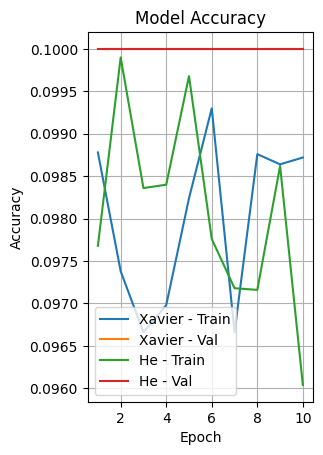

In [46]:
plt.subplot(1, 2, 1)
plt.plot(epochs, xavier_history['accuracy'], label='Xavier - Train')
plt.plot(epochs, xavier_history['val_accuracy'], label='Xavier - Val')
plt.plot(epochs, he_history['accuracy'], label='He - Train')
plt.plot(epochs, he_history['val_accuracy'], label='He - Val')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

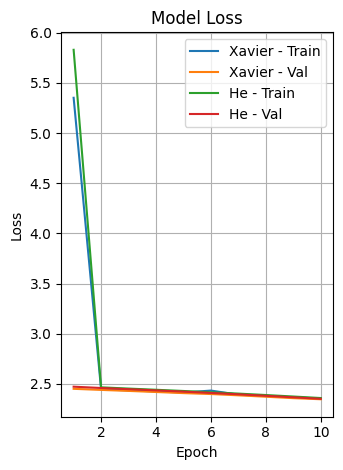

In [47]:
plt.subplot(1, 2, 2)
plt.plot(epochs, xavier_history['loss'], label='Xavier - Train')
plt.plot(epochs, xavier_history['val_loss'], label='Xavier - Val')
plt.plot(epochs, he_history['loss'], label='He - Train')
plt.plot(epochs, he_history['val_loss'], label='He - Val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()